# Applied Statistics for Machine Learning

# A. Probablity Fundamentals

Machine learning is full of unceertainty --- noisy labels, incomplete features, shifting behavior, rare-but-important events. Probability is the language we use to talk about that uncertainty clearly.  

This section will cover probability in a way that transfers: not as symbol-pushing, but as a toolkit for reasoning about data-generating processes and decisions under uncertainty. 

## A.1 Random variables: turning stories into measurable uncertainty

A random variable is not "random numbers", it is a rule that maps outcomes to numbers.  

**What is a random variable, really?**  
Think data-generating process. There is a world state, and an observation we record. A random variable is the object that represents the value we might observe.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Scenario</th>
            <th>Outcome space</th>
            <th>Random variable (numeric)</th>
            <th>What ML cares bout</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Coin flip</td>
            <td>{H,T}</td>
            <td>X = 1(H), 0(T)</td>
            <td>Bernoulli features, uncertainty</td>
        </tr>
        <tr>
            <td>Support ticket</td>
            <td>Many possible tickets</td>
            <td>T = resolution time (hours)</td>
            <td>Tail risk, SLAs, forecasting</td>
        </tr>
        <tr>
            <td>NYC 311 request</td>
            <td>All possible requests</td>
            <td>Y = "resolved within 24h" (0/1)</td>
            <td>Classification target</td>
        </tr>
    </tbody>
</table>

**KEY HABIT:**  
Always ask: What is the outcome space, and how am I mapping it to a number?

<table style="text-align:left;">
    <caption style="font-weight:bold;">Two Flavors: Discrete and Continuous</caption>
    <thead>
        <tr>
            <th>Type</th>
            <th>Examples</th>
            <th>Probability object</th>
            <th>Common pitfall</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Discrete</td>
            <td>Counts, categories mapped to numbers, 0/1 labels</td>
            <td>PMF: P(X=x)</td>
            <td>Forgetting probabilities must sum to 1</td>
        </tr>
        <tr>
            <td>Continuous</td>
            <td>Time, weight, temperature</td>
            <td>PDF: f(x) (area=probability)</td>
            <td>Thinking P(X = exact value) > 0</td>
        </tr>
    </tbody>
</table>

### Microlab: Random variables from simulation  

Simulate a dice-based random variable, estimate its PMF, and compute E[X] and Var(X)  
* **PMF:** Probability Mass Function (P(X=x).
    Gives all possible values the variable can take and the probability of each value

* **E[X]:** Expected Value (mean).
    Long run average of the random variable  
    $E[X] = \sum_x x \cdot P(X=x)$

* **Var(X):** Variance
    How spread out the values are around the mean  
    $Var(X) = E[X^2] - (E[X])^2$

Empirical PMF (approx):
0    0.83512
1    0.16488
Name: proportion, dtype: float64

E[X] ~ 0.16488
Var(X) ~ 0.1376945856


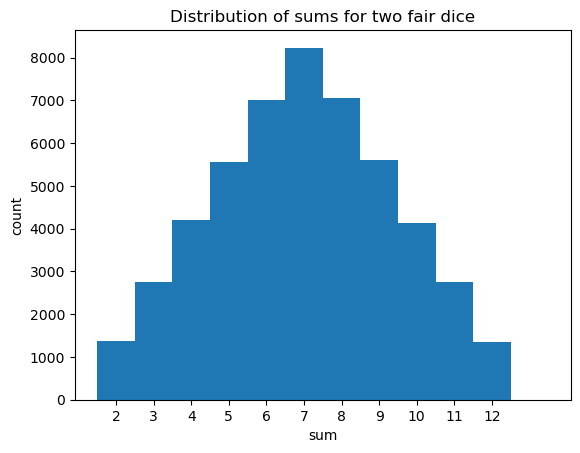

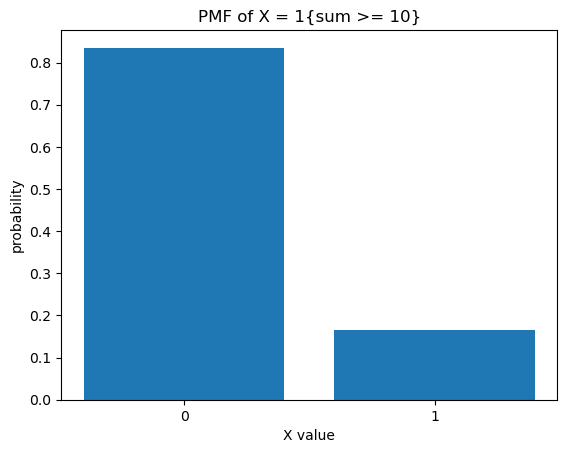


Key ideas:
1) A random variable is a mapping from outcomes (dice rolls) to numbers (0/1).
2) The PMF describes the distribution of that numeric variable.
3) E[X] is a long-run average; Var(X) captures typical fluctuation around that average.

Try:
- Redefine X as: X = sum (not an indicator). Recompute E[X] and Var(X).
- Change the rule to sum >= 11. How does E[X] change?
- Make one die 'loaded' by sampling from a custom distribution and see what breaks.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng()

# Define a random variable:
# Roll two dice. X = 1 if sum >= 10 else 0 (a "success" indicator).
n = 50_000
d1 = rng.integers(1, 7, size=n)
d2 = rng.integers(1, 7, size=n)
s = d1 + d2
X = (s >= 10).astype(int)

pmf = pd.Series(X).value_counts(normalize=True).sort_index()
print("Empirical PMF (approx):")
print(pmf)

EX = float(np.mean(X))
VarX = float(np.var(X, ddof=0))   # population variance for the simulated distribution
print("\nE[X] ~", EX)
print("Var(X) ~", VarX)

# Visualize the underlying process: distribution of sums
plt.figure()
plt.hist(s, bins=np.arange(2, 14+1) - 0.5)
plt.xticks(range(2, 13))
plt.title("Distribution of sums for two fair dice")
plt.xlabel("sum")
plt.ylabel("count")
plt.show()

# Visualize the random variable outcomes (0/1)
plt.figure()
plt.bar(pmf.index.astype(str), pmf.values)
plt.title("PMF of X = 1{sum >= 10}")
plt.xlabel("X value")
plt.ylabel("probability")
plt.show()

print("\nKey ideas:")
print("1) A random variable is a mapping from outcomes (dice rolls) to numbers (0/1).")
print("2) The PMF describes the distribution of that numeric variable.")
print("3) E[X] is a long-run average; Var(X) captures typical fluctuation around that average.")

print("\nTry:")
print("- Redefine X as: X = sum (not an indicator). Recompute E[X] and Var(X).")
print("- Change the rule to sum >= 11. How does E[X] change?")
print("- Make one die 'loaded' by sampling from a custom distribution and see what breaks.")

## A.2 Conditional probability: Updating beliefs with context

Conditional is how you say "Given what I know, what is still uncertain?"  

**What conditional probability mean:** 
Conditional probability answers a refined question: instead of $P(A)$ you ask $P(A | B)$; the probability of A among gases where B is true.  

**Definition**
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

**Most common mistake**  
Confusing $P(A|B)$ with $P(B|A)$. They can be very different

**Contingency Tables**  
In tabular data, conditional probability is often just "counts with a filter". A contingency table makes the denominator explicit.

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Question</th>
            <th>In words</th>
            <th>In data terms</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>P(Delayed)</td>
            <td>How often delayed overall?</td>
            <td>fraction of rows delayed</td>
        </tr>
        <tr>
            <td>P(Delayed | Agency=DOT)</td>
            <td>How often delayed among DOT cases?</td>
            <td>filter agency=DOT, then fraction delayed</td>
        </tr>
        <tr>
            <td>P(Agency=DONT | Delayed)</td>
            <td>Among delayed cases, how often DOT?</td>
            <td>filter delayed, then fraction DOT</td>
        </tr>
    </tbody>
    
</table>

### Microlab: Conditional probability with base rates  

Generate a synthetic dataset with a rare event and compute conditional probabilities. The goal is denominator discipline: always know what population you are conditioning on.  

In [2]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(10)
n = 50_000

# Scenario: "Fraud" is rare. "Flag" is a noisy detector.
# Base rate: P(Fraud)=1%
fraud = rng.random(n) < 0.01

# Detector quality:
# P(Flag | Fraud) = 0.90 (sensitivity)
# P(Flag | not Fraud) = 0.05 (false positive rate)
flag = np.where(fraud, rng.random(n) < 0.90, rng.random(n) < 0.05)

df = pd.DataFrame({"fraud": fraud, "flag": flag})

# Contingency table
ct = pd.crosstab(df["fraud"], df["flag"], rownames=["fraud"], colnames=["flag"])
print("Contingency table (counts):")
print(ct)

# Probabilities
P_fraud = df["fraud"].mean()
P_flag = df["flag"].mean()

P_flag_given_fraud = df.loc[df["fraud"], "flag"].mean()
P_fraud_given_flag = df.loc[df["flag"], "fraud"].mean()

print("\nKey probabilities:")
print("P(Fraud) =", float(P_fraud))
print("P(Flag)  =", float(P_flag))
print("P(Flag | Fraud) =", float(P_flag_given_fraud))
print("P(Fraud | Flag) =", float(P_fraud_given_flag))

print("\nInterpretation:")
print("- P(Flag | Fraud) asks: among truly fraudulent, how often do we flag?")
print("- P(Fraud | Flag) asks: among flagged cases, how often is it truly fraud?")
print("  These differ because fraud is rare (base rate is small).")

print("\nTry:")
print("- Change base rate to 10% (replace 0.01 with 0.10). What happens to P(Fraud | Flag)?")
print("- Improve false positive rate from 5% to 1%. Does that help more than increasing sensitivity?")
print("- Add a second signal and compute P(Fraud | Flag AND Signal).")

Contingency table (counts):
flag   False  True 
fraud              
False  46953   2538
True      54    455

Key probabilities:
P(Fraud) = 0.01018
P(Flag)  = 0.05986
P(Flag | Fraud) = 0.8939096267190569
P(Fraud | Flag) = 0.1520213832275309

Interpretation:
- P(Flag | Fraud) asks: among truly fraudulent, how often do we flag?
- P(Fraud | Flag) asks: among flagged cases, how often is it truly fraud?
  These differ because fraud is rare (base rate is small).

Try:
- Change base rate to 10% (replace 0.01 with 0.10). What happens to P(Fraud | Flag)?
- Improve false positive rate from 5% to 1%. Does that help more than increasing sensitivity?
- Add a second signal and compute P(Fraud | Flag AND Signal).


## A.3 Bayes' theorem: priors, evidence, and base rates  
Bayes is bookkeeping for belief updates.  

**The idea**  
Bayes' theorem relates two conditional probabilities and forces you to include the base rate (**prior**). In practice, Bayes answers: "Given this evidence, how should my belief change?"  

**Bayes theorem:**  
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$  

<table style="text-align:left;">
    <caption style="font-weight:bold;">What each term means</caption>
    <thead>
        <tr>
            <th>Term</th>
            <th>Name</th>
            <th>Interpretation</th>
            <th>Common failure mode</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>P(A)</td>
            <td>Prior</td>
            <td>Belief before new evidence</td>
            <td>Ignoring base rates</td>
        </tr>
        <tr>
            <td>P(B|A)</td>
            <td>Likelihood</td>
            <td>How compatible evidence is with A</td>
            <td>Overstating evidence strength</td>
        </tr>
        <tr>
            <td>P(A|B)</td>
            <td>Posterior</td>
            <td>Belief after seeing evidence</td>
            <td>Confusing with likelihood</td>
        </tr>
        <tr>
            <td>P(B)</td>
            <td>Evidence</td>
            <td>How common the evidence is overall</td>
            <td>Forgetting it depends on the whole population</td>
        </tr>
    </tbody>
</table>  

**Base rate neglect**  
If the prior is tiny, even good evidence may not make the posterior large. This shows up constantly in anomaly detection, fraud detection, and rare-event classification.  


### Microlab: Bayes update across different base rates  

Same test, same sensitivity, same false positive rate, only the base rate changes. The posterior can swing dramatically.  

Should notice that the test quality and class imbalance are inseparable. This is the heart of why accuracy can be a misleading metric in ML.  



Assumptions:
  Sensitivity P(Pos|A) = 0.9
  False positive rate P(Pos|~A) = 0.05

Posterior P(A|Pos) by prior:
  Prior P(A)= 0.001  ->  Posterior P(A|Pos)= 0.018
  Prior P(A)= 0.010  ->  Posterior P(A|Pos)= 0.154
  Prior P(A)= 0.050  ->  Posterior P(A|Pos)= 0.486
  Prior P(A)= 0.100  ->  Posterior P(A|Pos)= 0.667
  Prior P(A)= 0.250  ->  Posterior P(A|Pos)= 0.857
  Prior P(A)= 0.500  ->  Posterior P(A|Pos)= 0.947


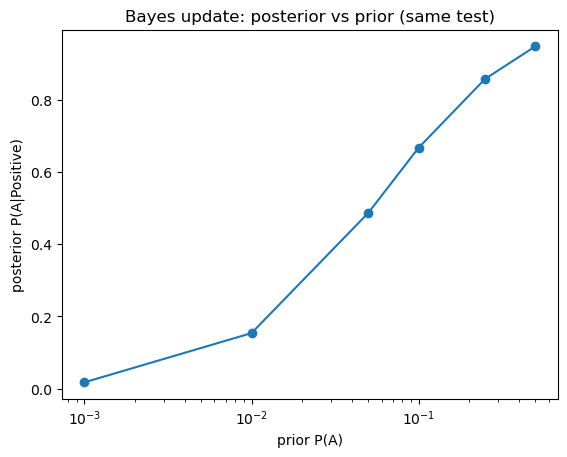


Key ideas:
1) Bayes is belief-updating: prior + evidence -> posterior.
2) When A is rare, false positives can dominate the positives.
3) Class imbalance is a probability problem, not just a modeling problem.

Try:
- Cut false positive rate from 0.05 to 0.01. Does posterior improve more than increasing sensitivity?
- Make sensitivity 0.70 and FPR 0.01. Which matters more depends on the prior.
- Replace x-axis log scale with linear to see why log is helpful for rare events.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64

# Test characteristics (fixed)
sensitivity = 0.90          # P(Positive | A)
false_positive_rate = 0.05  # P(Positive | not A)

priors = np.array([0.001, 0.01, 0.05, 0.10, 0.25, 0.50])  # P(A)

def posterior(prior):
    # P(Pos) = P(Pos|A)P(A) + P(Pos|~A)P(~A)
    p_pos = sensitivity * prior + false_positive_rate * (1 - prior)
    return (sensitivity * prior) / p_pos

post = np.array([posterior(p) for p in priors])

print("Assumptions:")
print("  Sensitivity P(Pos|A) =", sensitivity)
print("  False positive rate P(Pos|~A) =", false_positive_rate)

print("\nPosterior P(A|Pos) by prior:")
for p, q in zip(priors, post):
    print(f"  Prior P(A)={p:>6.3f}  ->  Posterior P(A|Pos)={q:>6.3f}")

plt.figure()
plt.plot(priors, post, marker="o")
plt.title("Bayes update: posterior vs prior (same test)")
plt.xlabel("prior P(A)")
plt.ylabel("posterior P(A|Positive)")
plt.xscale("log")
plt.show()

print("\nKey ideas:")
print("1) Bayes is belief-updating: prior + evidence -> posterior.")
print("2) When A is rare, false positives can dominate the positives.")
print("3) Class imbalance is a probability problem, not just a modeling problem.")

print("\nTry:")
print("- Cut false positive rate from 0.05 to 0.01. Does posterior improve more than increasing sensitivity?")
print("- Make sensitivity 0.70 and FPR 0.01. Which matters more depends on the prior.")
print("- Replace x-axis log scale with linear to see why log is helpful for rare events.")

## A.4 Lab exercise with NYC311 - in lab notebook